<a href="https://colab.research.google.com/github/ElsCorporation/ChallengeAluraTelecom/blob/main/TelecomXEdinhoLima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

importação das bibliotecas:

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns


Extração dos dados:

In [51]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
dados_brutos = pd.read_json(url)
dados_brutos

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


Armazenar nome das colunas com nomes não-aninhados e aninhados:

In [52]:
colunas_normais = dados_brutos.columns[:2]
colunas_aninhadas = dados_brutos.columns[2:]

Salvar os dados não-aninhados separadamente:

In [53]:
dados_normais = dados_brutos.drop(columns=colunas_aninhadas)
dados_normais

,customerID,Churn
0,0002-ORFBO,No
1,0003-MKNFE,No
2,0004-TLHLJ,Yes
3,0011-IGKFF,Yes
4,0013-EXCHZ,Yes
...,...,...
7262,9987-LUTYD,No
7263,9992-RRAMN,Yes
7264,9992-UJOEL,No
7265,9993-LHIEB,No


Normalizar os dados das colunas aninhadas:

In [54]:
dataframe_normalizado = []

for coluna in colunas_aninhadas:
    df_normalizado = pd.json_normalize(dados_brutos[coluna])
    df_normalizado.columns = [f"{coluna}_{subcol}" for subcol in df_normalizado.columns]
    dataframe_normalizado.append(df_normalizado)

dados_final = pd.concat([dados_normais] + dataframe_normalizado, axis=1)
dados_final

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


Salvar o nome das colunas do novo DataFrame:

In [55]:
nome_colunas_final = list(dados_final.columns)
nome_colunas_final

['customerID',
 'Churn',
 'customer_gender',
 'customer_SeniorCitizen',
 'customer_Partner',
 'customer_Dependents',
 'customer_tenure',
 'phone_PhoneService',
 'phone_MultipleLines',
 'internet_InternetService',
 'internet_OnlineSecurity',
 'internet_OnlineBackup',
 'internet_DeviceProtection',
 'internet_TechSupport',
 'internet_StreamingTV',
 'internet_StreamingMovies',
 'account_Contract',
 'account_PaperlessBilling',
 'account_PaymentMethod',
 'account_Charges.Monthly',
 'account_Charges.Total']

#🔧 Transformação

Conhecendo o Dataset:

In [56]:
dados_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

Verificando Valores ausentes:

In [57]:
count = dados_final.isnull().sum()
count

,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


Verificando dados únicos:


In [58]:
for colunas in dados_final.columns:
  print(f"\nColuna: {colunas}")
  print(f"Valores únicos: {dados_final[colunas].nunique()}")
  print(f"Valores:\n{dados_final[colunas].value_counts()} ")


Coluna: customerID
Valores únicos: 7267
Valores:
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7267, dtype: int64 

Coluna: Churn
Valores únicos: 3
Valores:
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64 

Coluna: customer_gender
Valores únicos: 2
Valores:
customer_gender
Male      3675
Female    3592
Name: count, dtype: int64 

Coluna: customer_SeniorCitizen
Valores únicos: 2
Valores:
customer_SeniorCitizen
0    6085
1    1182
Name: count, dtype: int64 

Coluna: customer_Partner
Valores únicos: 2
Valores:
customer_Partner
No     3749
Yes    3518
Name: count, dtype: int64 

Coluna: customer_Dependents
Valores únicos: 2
Valores:
customer_Dependents
No     5086
Yes    2181
Name: count, dtype: int64 

Coluna: customer_tenure
Valores únicos: 73
Valores:
customer_tenure
1     634
72    369
2     246
3     207


Verificando os dados na coluna "Churn":

In [59]:
dados_final['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

Foi encontrado uma string vazia.

Substituir todas as strings vazias por NaN:

In [60]:
dados_final['Churn'] = dados_final['Churn'].replace('', np.nan)
dados_final['Churn'].unique()

array(['No', 'Yes', nan], dtype=object)

Remover todas as linhas do dataframe que possuem valor "NaN" na coluna "Churn":

In [61]:
dados_final.dropna(subset=['Churn'], inplace=True)
dados_final['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [62]:
dados_final

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [63]:
dados_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer_gender            7043 non-null   object 
 3   customer_SeniorCitizen     7043 non-null   int64  
 4   customer_Partner           7043 non-null   object 
 5   customer_Dependents        7043 non-null   object 
 6   customer_tenure            7043 non-null   int64  
 7   phone_PhoneService         7043 non-null   object 
 8   phone_MultipleLines        7043 non-null   object 
 9   internet_InternetService   7043 non-null   object 
 10  internet_OnlineSecurity    7043 non-null   object 
 11  internet_OnlineBackup      7043 non-null   object 
 12  internet_DeviceProtection  7043 non-null   object 
 13  internet_TechSupport       7043 non-null   object 
 1

Criação da Coluna "Contas_Diarias", utilizando a coluna "account_Charges.Monthly"

Converter a coluna "account_charges.Total para float:

In [64]:
dados_final['account_Charges.Total'] = pd.to_numeric(dados_final['account_Charges.Total'], errors='coerce')
dados_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer_gender            7043 non-null   object 
 3   customer_SeniorCitizen     7043 non-null   int64  
 4   customer_Partner           7043 non-null   object 
 5   customer_Dependents        7043 non-null   object 
 6   customer_tenure            7043 non-null   int64  
 7   phone_PhoneService         7043 non-null   object 
 8   phone_MultipleLines        7043 non-null   object 
 9   internet_InternetService   7043 non-null   object 
 10  internet_OnlineSecurity    7043 non-null   object 
 11  internet_OnlineBackup      7043 non-null   object 
 12  internet_DeviceProtection  7043 non-null   object 
 13  internet_TechSupport       7043 non-null   object 
 1

Adicionando a coluna "Contas_Diarias"

In [65]:
dados_final['Contas_Diarias'] = ((dados_final['account_Charges.Total'] / dados_final['customer_tenure'])/30).round(2)
dados_final

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.20
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,2.01
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.34
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.17
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.84
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.55
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.30


Renomear Colunas:

In [66]:
dados_final = dados_final.rename(columns={
    'customerID': 'cliente_ID',
    'Churn': 'Churn',
    'customer_gender': 'cliente_genero',
    'customer_SeniorCitizen': 'cliente_senior',
    'customer_Partner': 'cliente_parceiro',
    'customer_Dependents': 'cliente_dependentes',
    'customer_tenure': 'cliente_tenure',
    'phone_PhoneService': 'telefone_servico',
    'phone_MultipleLines': 'telefone_multiplas_linhas',
    'internet_InternetService': 'internet_servico',
    'internet_OnlineSecurity': 'internet_seguranca_online',
    'internet_OnlineBackup': 'internet_backup_online',
    'internet_DeviceProtection': 'internet_protecao_dispositivo',
    'internet_TechSupport': 'internet_suporte_tecnico',
    'internet_StreamingTV': 'internet_streaming_tv',
    'internet_StreamingMovies': 'internet_streaming_filmes',
    'internet_Contract': 'internet_contrato',
    'internet_PaperlessBilling': 'internet_fatura_online',
    'payment_PaymentMethod': 'pagamento_metodo',
    'payment_Charges.Monthly': 'pagamento_mensal',
    'payment_Charges.Total': 'pagamento_total',
    'account_Contract': 'conta_contrato',
    'account_PaperlessBilling': 'conta_fatura_online',
    'account_PaymentMethod': 'conta_metodo_pagamento',
    'account_Charges.Monthly': 'conta_mensal',
    'account_Charges.Total': 'conta_total',
    'Contas_Diarias': 'Contas_Diarias'
})
dados_final.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cliente_ID                     7043 non-null   object 
 1   Churn                          7043 non-null   object 
 2   cliente_genero                 7043 non-null   object 
 3   cliente_senior                 7043 non-null   int64  
 4   cliente_parceiro               7043 non-null   object 
 5   cliente_dependentes            7043 non-null   object 
 6   cliente_tenure                 7043 non-null   int64  
 7   telefone_servico               7043 non-null   object 
 8   telefone_multiplas_linhas      7043 non-null   object 
 9   internet_servico               7043 non-null   object 
 10  internet_seguranca_online      7043 non-null   object 
 11  internet_backup_online         7043 non-null   object 
 12  internet_protecao_dispositivo  7043 non-null   object

Transformando valores de string em binários:


In [67]:
dados_final.head()

,cliente_ID,Churn,cliente_genero,cliente_senior,cliente_parceiro,cliente_dependentes,cliente_tenure,telefone_servico,telefone_multiplas_linhas,internet_servico,...,internet_protecao_dispositivo,internet_suporte_tecnico,internet_streaming_tv,internet_streaming_filmes,conta_contrato,conta_fatura_online,conta_metodo_pagamento,conta_mensal,conta_total,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.20
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.01
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.34
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.17
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.97


In [68]:
colunas_binarias = [
    'cliente_parceiro',
    'cliente_dependentes',
    'telefone_servico',
    'telefone_multiplas_linhas',
    'internet_seguranca_online',
    'internet_backup_online',
    'internet_protecao_dispositivo',
    'internet_suporte_tecnico',
    'internet_streaming_tv',
    'internet_streaming_filmes',
    'conta_fatura_online'
]

In [69]:
dados_final[colunas_binarias] = dados_final[colunas_binarias].replace({'Yes': 1, 'No': 0})
dados_final.head()

/tmp/ipython-input-69-3523512552.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,cliente_ID,Churn,cliente_genero,cliente_senior,cliente_parceiro,cliente_dependentes,cliente_tenure,telefone_servico,telefone_multiplas_linhas,internet_servico,...,internet_protecao_dispositivo,internet_suporte_tecnico,internet_streaming_tv,internet_streaming_filmes,conta_contrato,conta_fatura_online,conta_metodo_pagamento,conta_mensal,conta_total,Contas_Diarias
0,0002-ORFBO,No,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.20
1,0003-MKNFE,No,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.01
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.34
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.17
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.97


In [70]:
dados_final['cliente_genero'] = dados_final['cliente_genero'].replace({'Male': 'Masculino', 'Female': 'Feminino'})
dados_final.head()

,cliente_ID,Churn,cliente_genero,cliente_senior,cliente_parceiro,cliente_dependentes,cliente_tenure,telefone_servico,telefone_multiplas_linhas,internet_servico,...,internet_protecao_dispositivo,internet_suporte_tecnico,internet_streaming_tv,internet_streaming_filmes,conta_contrato,conta_fatura_online,conta_metodo_pagamento,conta_mensal,conta_total,Contas_Diarias
0,0002-ORFBO,No,Feminino,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.20
1,0003-MKNFE,No,Masculino,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.01
2,0004-TLHLJ,Yes,Masculino,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.34
3,0011-IGKFF,Yes,Masculino,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.17
4,0013-EXCHZ,Yes,Feminino,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.97


In [71]:
dados_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cliente_ID                     7043 non-null   object 
 1   Churn                          7043 non-null   object 
 2   cliente_genero                 7043 non-null   object 
 3   cliente_senior                 7043 non-null   int64  
 4   cliente_parceiro               7043 non-null   int64  
 5   cliente_dependentes            7043 non-null   int64  
 6   cliente_tenure                 7043 non-null   int64  
 7   telefone_servico               7043 non-null   int64  
 8   telefone_multiplas_linhas      7043 non-null   object 
 9   internet_servico               7043 non-null   object 
 10  internet_seguranca_online      7043 non-null   object 
 11  internet_backup_online         7043 non-null   object 
 12  internet_protecao_dispositivo  7043 non-null   object

#📊 Carga e análise

In [72]:
dados_final.describe()

,cliente_senior,cliente_parceiro,cliente_dependentes,cliente_tenure,telefone_servico,conta_fatura_online,conta_mensal,conta_total,Contas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7032.000000
mean,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2283.300441,2.159879
std,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.771362,1.006217
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.460000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,401.450000,1.207500
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,2.350000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3794.737500,3.010000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,4.050000


In [73]:
import plotly.express as px

# Gráficos de distribuição de Evasão por Clientes 🏢

In [74]:
fig_evasao = px.histogram(dados_final, x='Churn', title='Evasão de Clientes', text_auto=True)
fig_evasao.show()

In [75]:
fig_evasao_genero = px.histogram(dados_final, x='cliente_genero', color='Churn', barmode='group', title='Distribuição de Evasão por Gênero', text_auto=True)
fig_evasao_genero.show()

In [76]:
fig_evasao_senior = px.histogram(dados_final, x='cliente_senior', color='Churn', barmode='group', title='Distribuição de Evasão por Cliente com Dependentes Sêniors', text_auto=True)
fig_evasao_senior.show()

In [77]:
fig_evasao_parceiro = px.histogram(dados_final, x='cliente_parceiro', color='Churn', barmode='group', title='Distribuição de Evasão por Clientes com Parceiros', text_auto=True)
fig_evasao_parceiro.show()

In [78]:
fig_evasao_dependente = px.histogram(dados_final, x='cliente_dependentes', color='Churn', barmode='group', title='Distribuição de Evasão por Clientes com Dependentes', text_auto=True)
fig_evasao_dependente.show()

# Distribuição de Evasão por Variáveis Numéricas:

In [79]:
fig_evasao_servico_telefone = px.histogram(dados_final, x='telefone_servico', color='Churn', barmode='group', title='Distribuição de Evasão por Clientes com Serviço de Telefone', text_auto=True)
fig_evasao_servico_telefone.show()

In [80]:
fig_evasao_fidelidade = px.histogram(dados_final, x='cliente_tenure', color='Churn', barmode='group', title='Distribuição de Evasão por Fidelidade')
fig_evasao_fidelidade.show()

In [81]:
fig_evasao_internet_servico = px.histogram(dados_final, x='internet_servico', color='Churn', barmode='group', title='Distribuição de Evasão por Clientes com Serviço de Internet', text_auto=True)
fig_evasao_internet_servico.show()

In [82]:
fig_evasao_multiplas_linhas = px.histogram(dados_final, x='telefone_multiplas_linhas', color='Churn', barmode='group', title='Distribuição de Evasão por Clientes com Multiplas Linhas', text_auto=True)
fig_evasao_multiplas_linhas.show()

In [83]:
fig_evasao_seguranca_online = px.histogram(dados_final, x='internet_seguranca_online', color='Churn', barmode='group', title='Distribuição de Evasão por Clientes com Segurança Online', text_auto=True)
fig_evasao_seguranca_online.show()

In [84]:
fig_evasao_backup_online = px.histogram(dados_final, x='internet_backup_online', color='Churn', barmode='group', title='Distribuição de Evasão por Clientes com Backup Online', text_auto=True)
fig_evasao_backup_online.show()

In [85]:
fig_evasao_protecao_dispositivo = px.histogram(dados_final, x='internet_protecao_dispositivo', color='Churn', barmode='group', title='Distribuição de Evasão por Clientes com Proteção de Dispositivo', text_auto=True)
fig_evasao_protecao_dispositivo.show()

In [86]:
fig_evasao_suporte_tecnico = px.histogram(dados_final, x='internet_suporte_tecnico', color='Churn', barmode='group', title='Distribuição de Evasão por Clientes com Suporte Técnico', text_auto=True)
fig_evasao_suporte_tecnico.show()

In [87]:
fig_evasao_streaming_tv = px.histogram(dados_final, x='internet_streaming_tv', color='Churn', barmode='group', title='Distribuição de Evasão por Clientes com Streaming de TV', text_auto=True)
fig_evasao_streaming_tv.show()

In [88]:
fig_evasao_streaming_filmes = px.histogram(dados_final, x='internet_streaming_filmes', color='Churn', barmode='group', title='Distribuição de Evasão por Clientes com Streaming de Filmes', text_auto=True)
fig_evasao_streaming_filmes.show()

In [89]:
fig_evasao_contrato = px.histogram(dados_final, x='conta_contrato', color='Churn', barmode='group', title='Distribuição de Evasão por Clientes com Contrato', text_auto=True)
fig_evasao_contrato.show()

In [90]:
fig_evasao_fatura_online = px.histogram(dados_final, x='conta_fatura_online', color='Churn', barmode='group', title='Distribuição de Evasão por Clientes com Fatura Online', text_auto=True)
fig_evasao_fatura_online.show()

In [91]:
fig_evasao_metodo_pagamento = px.histogram(dados_final, x='conta_metodo_pagamento', color='Churn', barmode='group', title='Distribuição de Evasão por Clientes com Método de Pagamento', text_auto=True)
fig_evasao_metodo_pagamento.show()

In [92]:
fig_evasao_mensal = px.histogram(dados_final, x='conta_mensal', color='Churn', barmode='group', title='Distribuição de Evasão por Clientes com Mensalidade', text_auto=True)
fig_evasao_mensal.show()

In [93]:
fig_evasao_total = px.histogram(dados_final, x='conta_total', color='Churn', barmode='group', title='Distribuição de Evasão por Clientes com Total', text_auto=True)
fig_evasao_total.show()

In [94]:
fig_evasao_mensal_diarias = px.histogram(dados_final, x='Contas_Diarias', color='Churn', barmode='group', title='Distribuição de Evasão por Clientes com Contas Diárias', text_auto=True)
fig_evasao_mensal_diarias.show()

Salvar os gráficos:

In [95]:
fig_evasao.write_html('01_evasao_geral.html')
fig_evasao_genero.write_html('02_evasao_genero.html')
fig_evasao_senior.write_html('03_evasao_senior.html')
fig_evasao_parceiro.write_html('04_evasao_parceiro.html')
fig_evasao_dependente.write_html('05_evasao_dependente.html')
fig_evasao_servico_telefone.write_html('06_evasao_servico_telefone.html')
fig_evasao_fidelidade.write_html('07_evasao_fidelidade.html')
fig_evasao_internet_servico.write_html('08_evasao_internet_servico.html')
fig_evasao_multiplas_linhas.write_html('09_evasao_multiplas_linhas.html')
fig_evasao_seguranca_online.write_html('10_evasao_seguranca_online.html')
fig_evasao_backup_online.write_html('11_evasao_backup_online.html')
fig_evasao_protecao_dispositivo.write_html('12_evasao_protecao_dispositivo.html')
fig_evasao_suporte_tecnico.write_html('13_evasao_suporte_tecnico.html')
fig_evasao_streaming_tv.write_html('14_evasao_streaming_tv.html')
fig_evasao_streaming_filmes.write_html('15_evasao_streaming_filmes.html')
fig_evasao_contrato.write_html('16_evasao_contrato.html')
fig_evasao_fatura_online.write_html('17_evasao_fatura_online.html')
fig_evasao_metodo_pagamento.write_html('18_evasao_metodo_pagamento.html')
fig_evasao_mensal.write_html('19_evasao_mensal.html')
fig_evasao_total.write_html('20_evasao_total.html')
fig_evasao_mensal_diarias.write_html('21_evasao_mensal_diarias.html')

#📄Relatorio Final

# Introdução 🍃

O nosso principal objetivo desse desafio é encontrar os principais fatores que estão causando os desligamentos de clientes, com uma análise de dados aprofundada, filtrando resultados equivocados e gerando gráficos que nos auxiliem na visualização. O principal foco é comparar os desligamentos dos clientes com outras variáveis dos dados para encontrar os motivos para tal decisão.

# Limpeza e Tratamento dos dados 🖱

As seguintes etapas foram cruciais para reestruturar os dados para uma melhor análise:

* **Desaninhamento dos dados**

Os dados recebidos possuiam colunas com informações aninhadas. Foi necessário um desaninhamento, separando as colunas aninhadas com as que possuiam apenas um uníco tipo de informação. Após a separação de dados aninhados, foi feito uma junção dos dados com os dados que não possuiam aninhamentos.

* **Investigando as informações de cada coluna do DataFrame**

Nas investigações dos dados, foi encontrado dados vazios em alguma das linhas da coluna "Churn", para a eliminação desses dados, foi atribuido um valor "NaN" para todas essas linhas, e depois elas foram eliminadas pelo método .dropna().

* **Coluna Contas_Diarias adicionada**

Primeiramente, foi preciso converter a coluna "account_Charges.Total" para valores numéricos, para então, criar a nova coluna, usando a seguinte fórmula:

contas_diarias = ( (conta total / tempo de fidelidade ) / 30 )
Arrendondar o valor em até duas casas decimais.

* **Tratamento dos dados**

Foram feitas algumas conversões de dados de várias colunas, com valor de "Yes" para 1 e "No" para zero, além de traduzir os textos, tanto das colunas, quanto os valores de "Male" para "Masculino" e "Female" para "Feminino".

* **Criação de Gráficos**

Após todos os dados forem tratados, a próxima etapa foi a criação dos gráficos, comparando os valores de "Churn"(Evasão) com todas as variáveis dos dados, como por exemplo, os dados de evasão com "Gênero" para descobrir quais deles tem maior evasão.


# Análise Exploratória de Dados 🖊

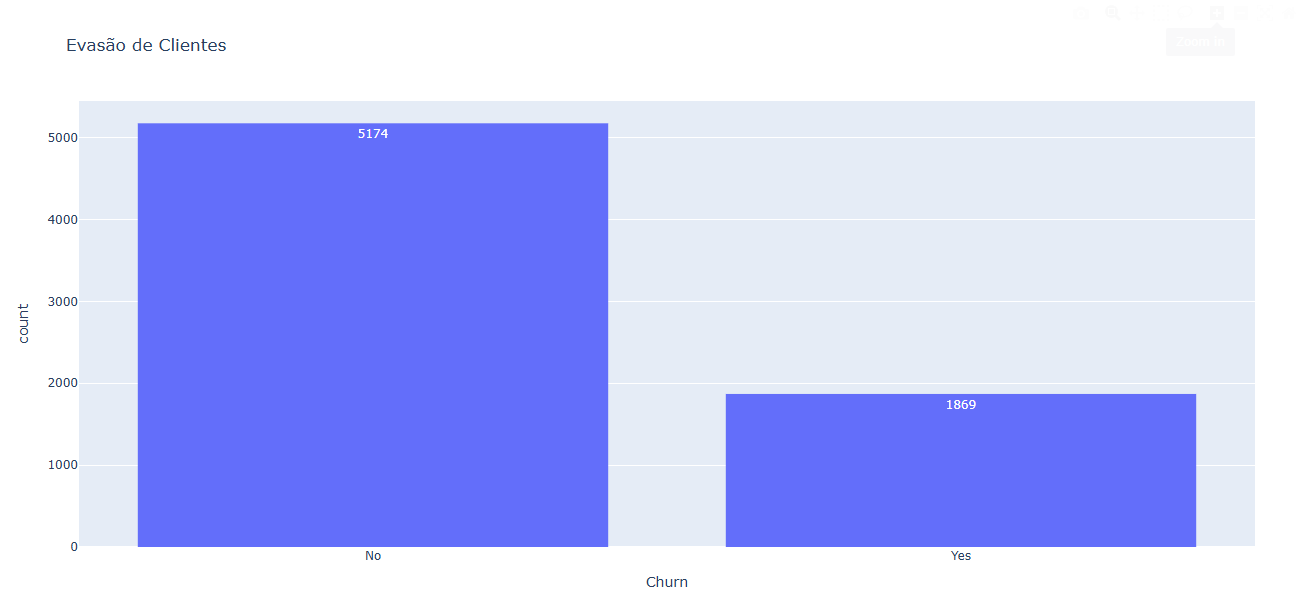

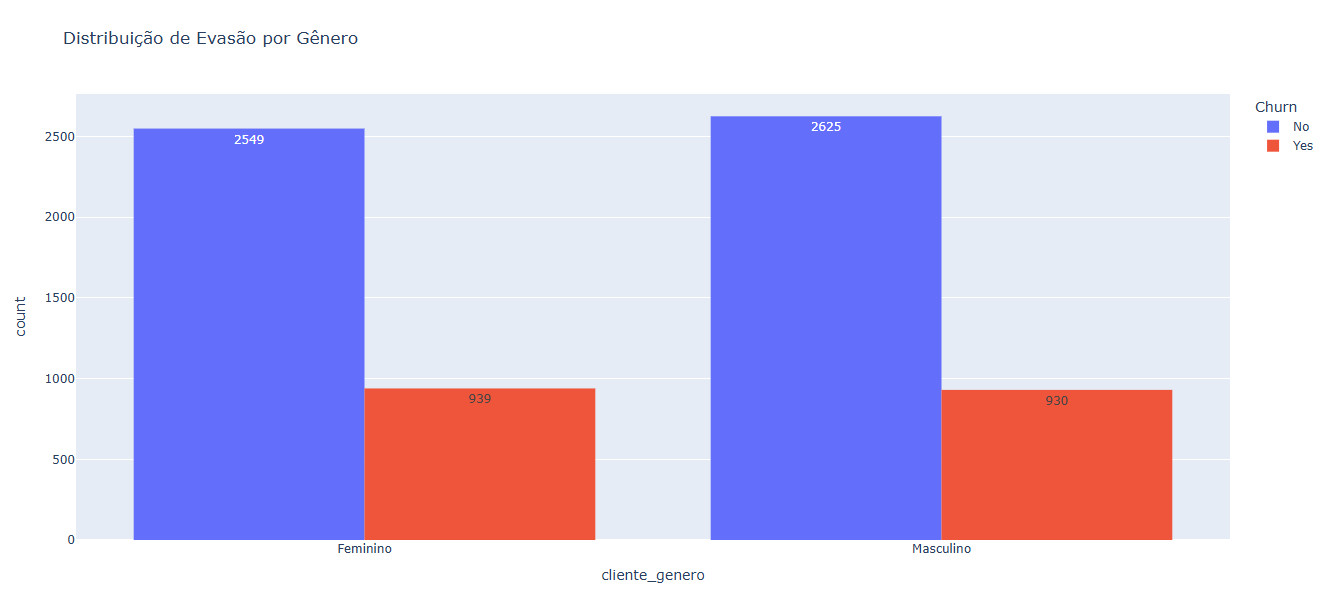

Nesse gráfico, é possível ver que há um equilibrio de evasão entre os gêneros.

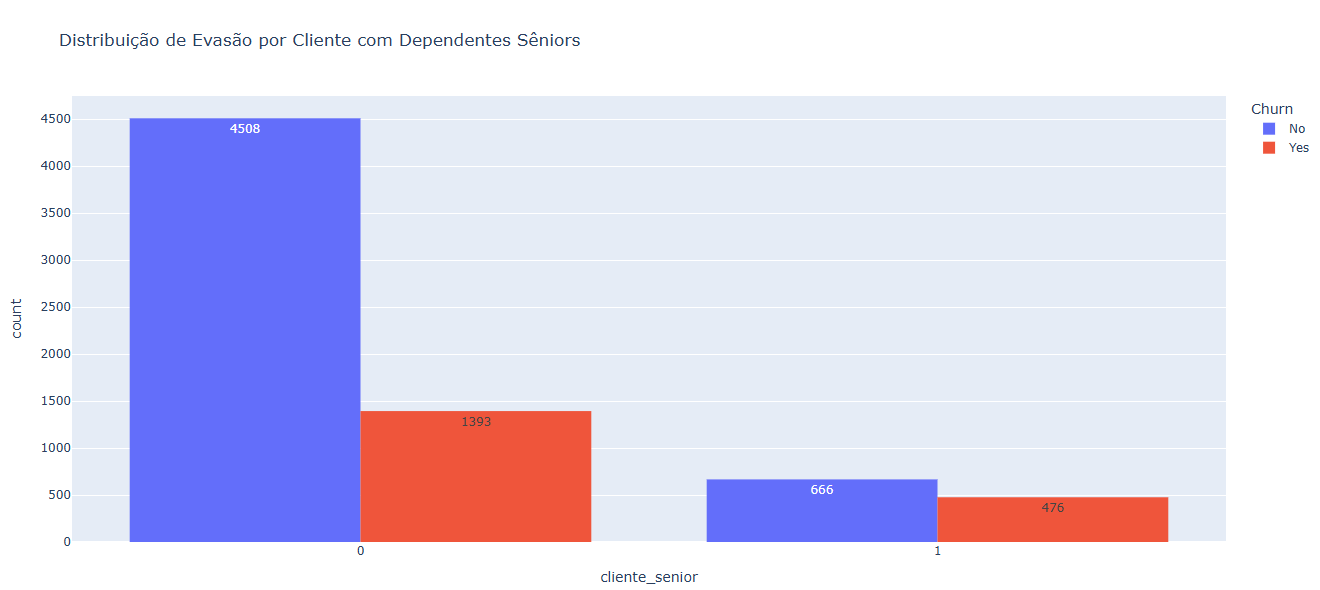

Nesse gráfico, é possível ver que a evasão de clientes é maior em quem não possuem pessoas sêniors.

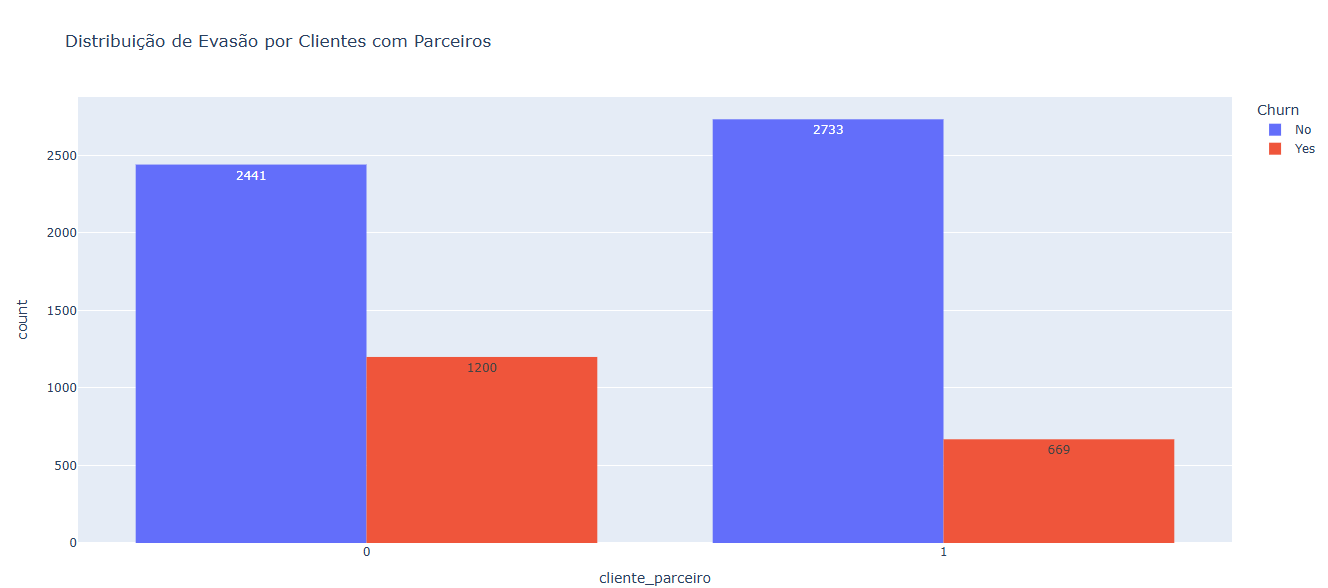

Nesse gráfico, segue o mesmo padrão do anterior, só que com parceiros(as).

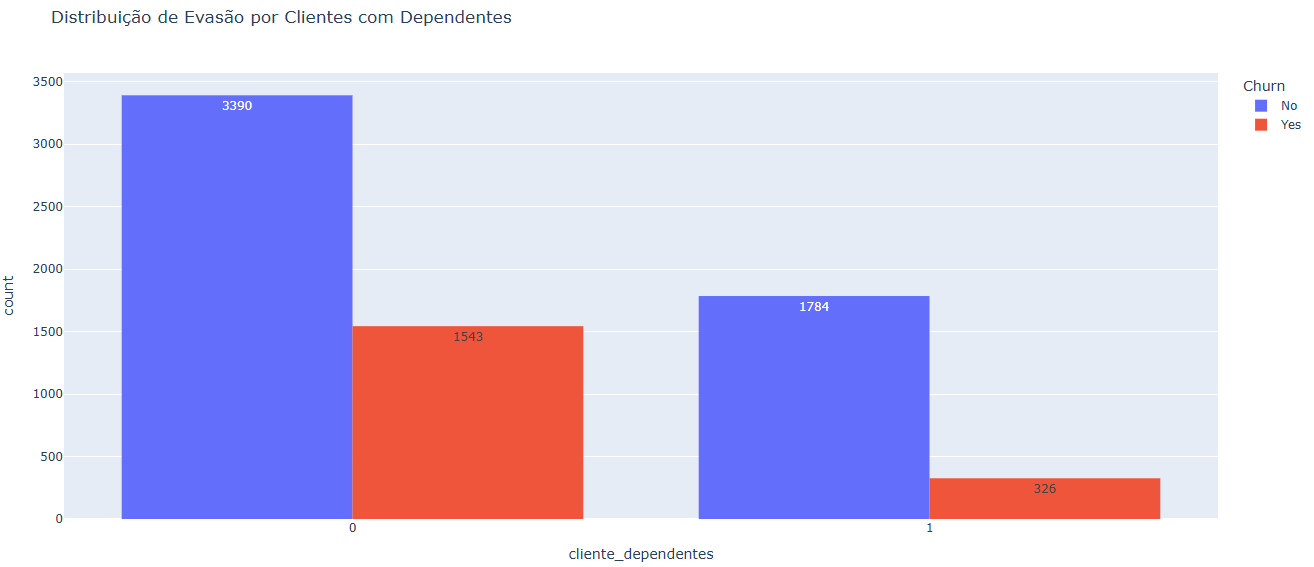

Mesmo padrão, só que com dependentes.

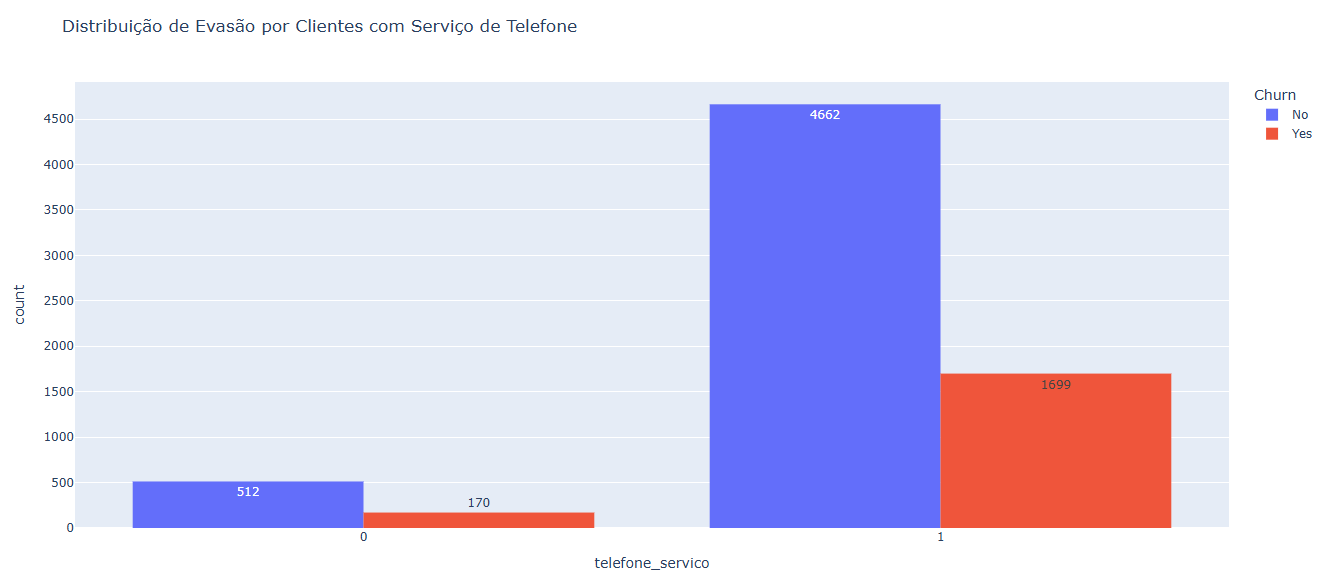

A evasão de clientes é maior em quem possuem Serviços de Telefone.

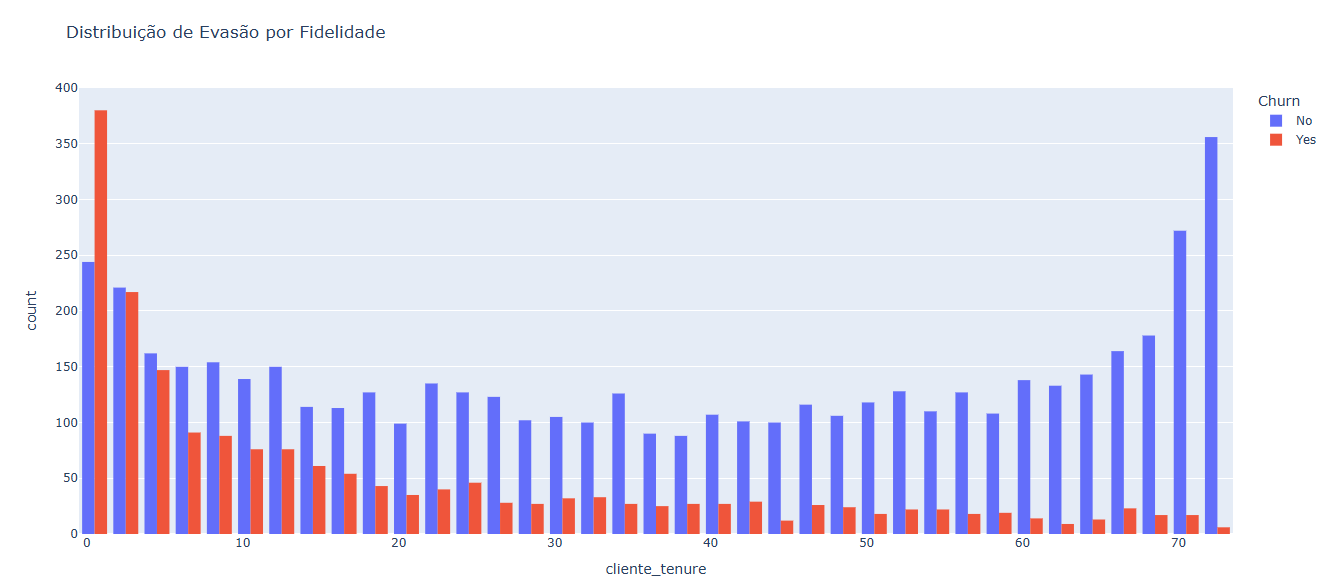

A Evasão de clientes é maior nos primeiros meses do contrato.

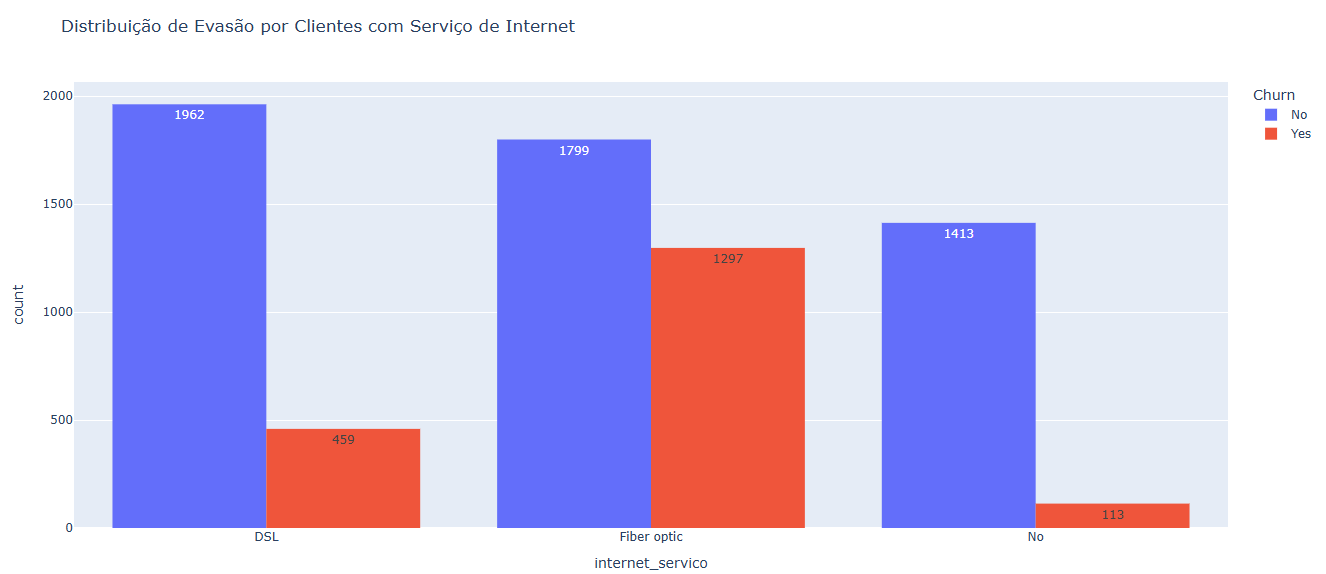

A Evasão de clientes é maior em quem possuem Fibra Óptica.

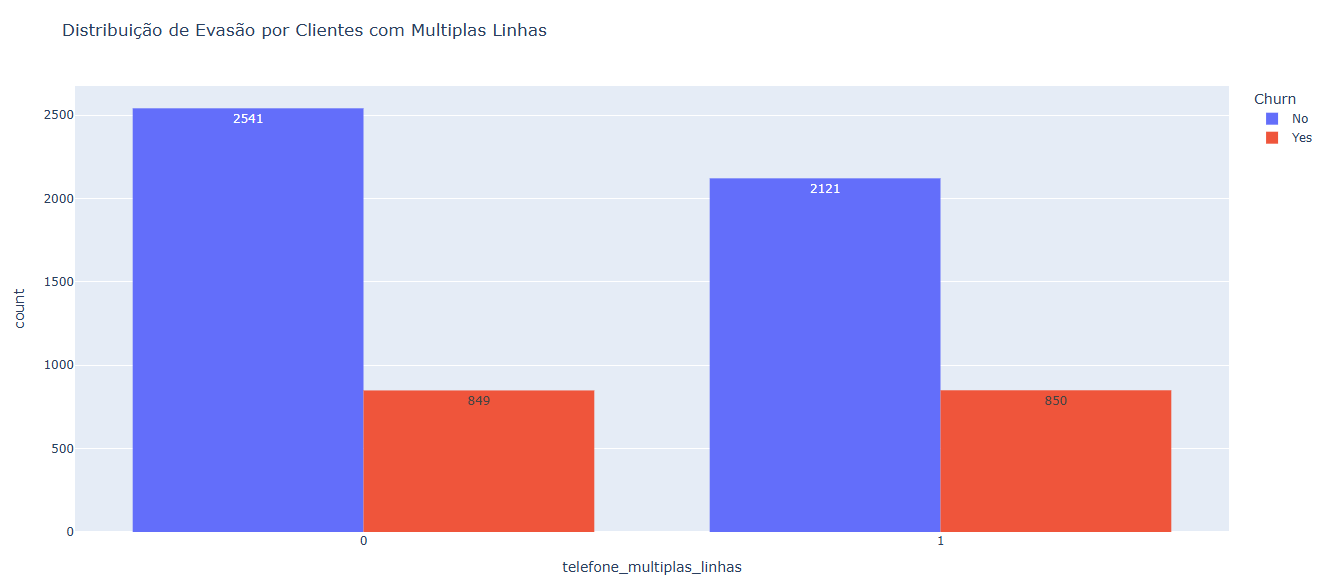

Há um equilibro de evasão de clientes que possuem ou não múltiplas linhas de telefone.

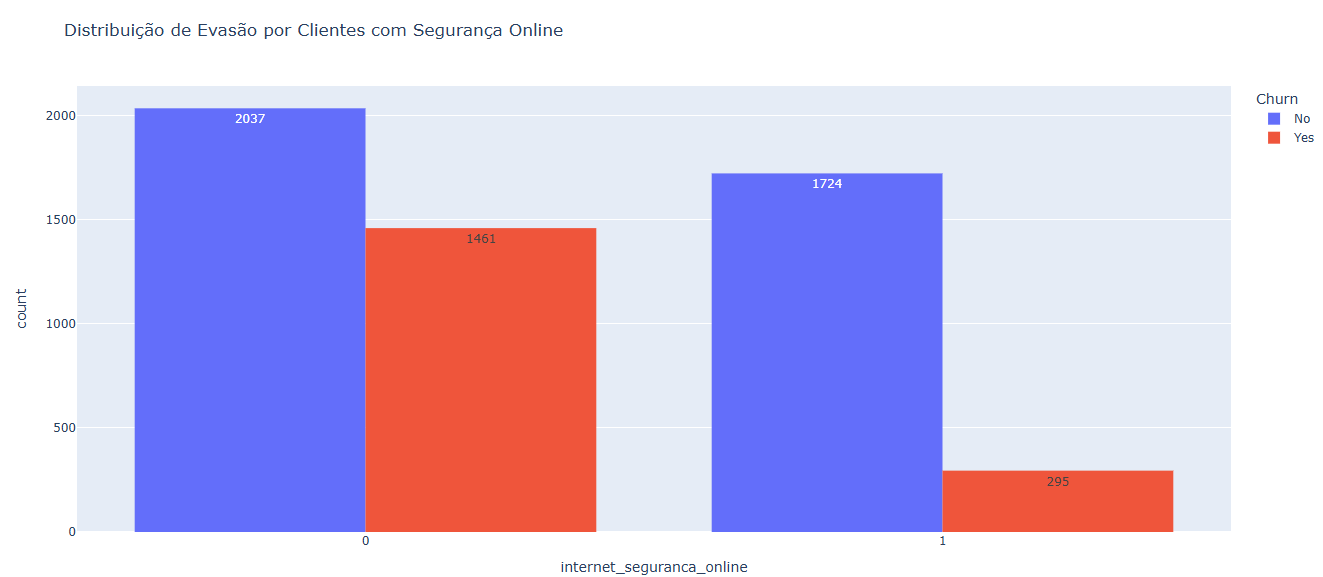

A evasão de clientes é maior em que não possuem segurança online.

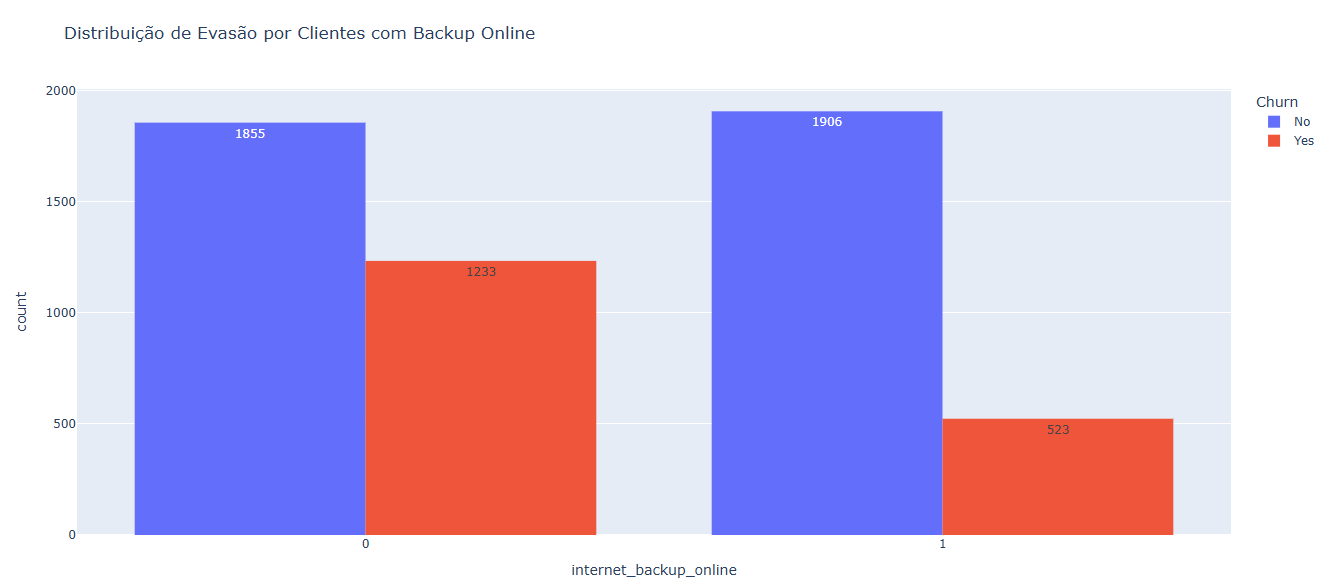

Mesmo motivo do que o gráfico anterior, porém com Backup Online.

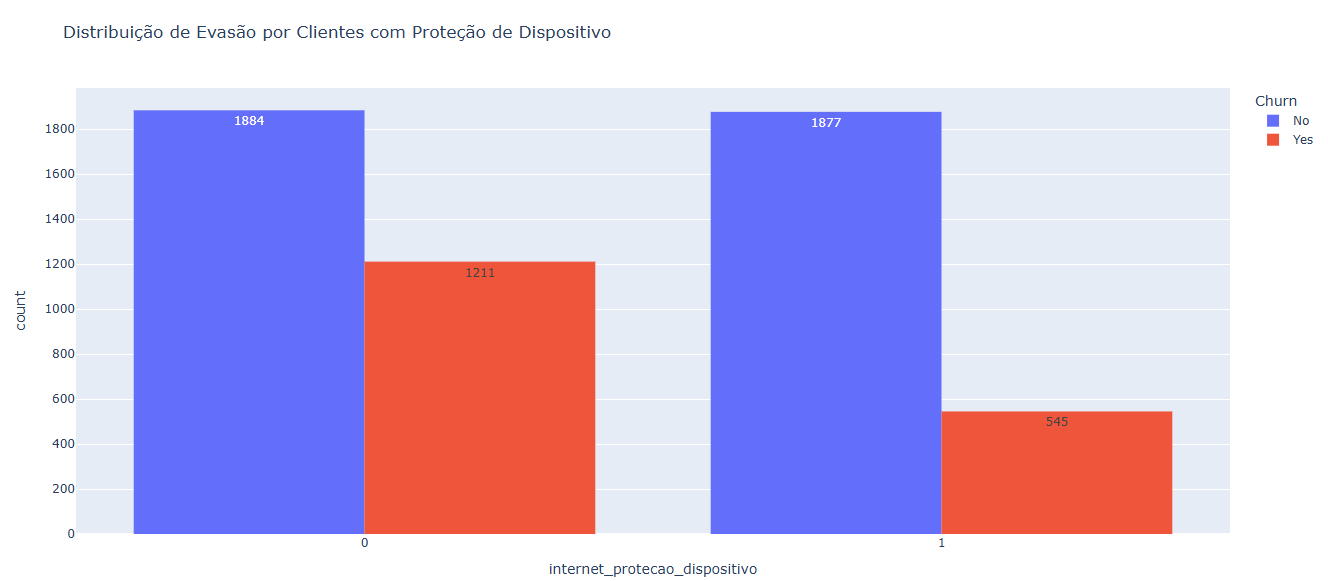

O padrão se repete novamente nesse gráfico, porém com Proteção de Dispositivo.

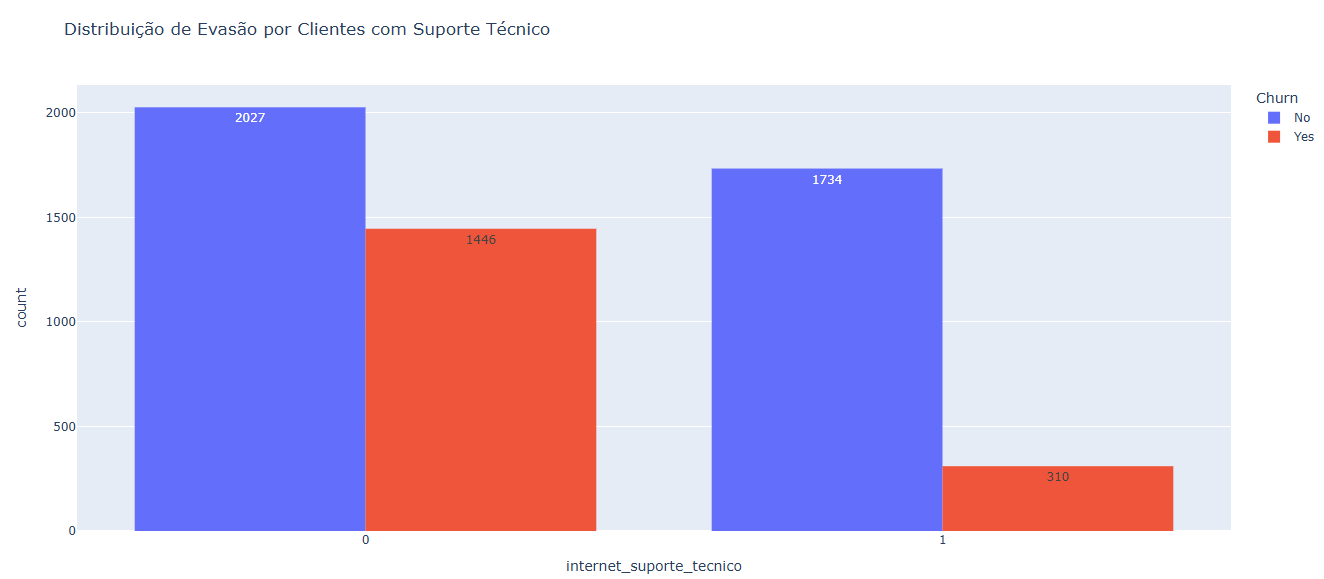

Sem suporte técnico, a evasão é muito maior.

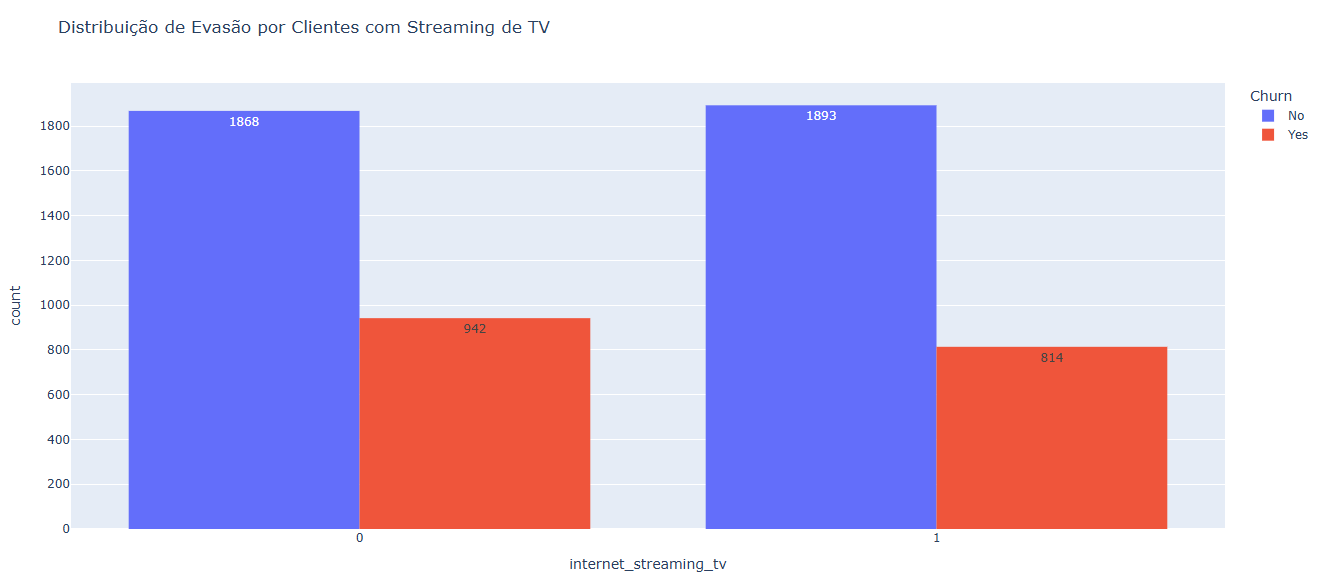

Há um equilibrio entre evasão de clientes que possuem ou não serviço de Streaming de TV.

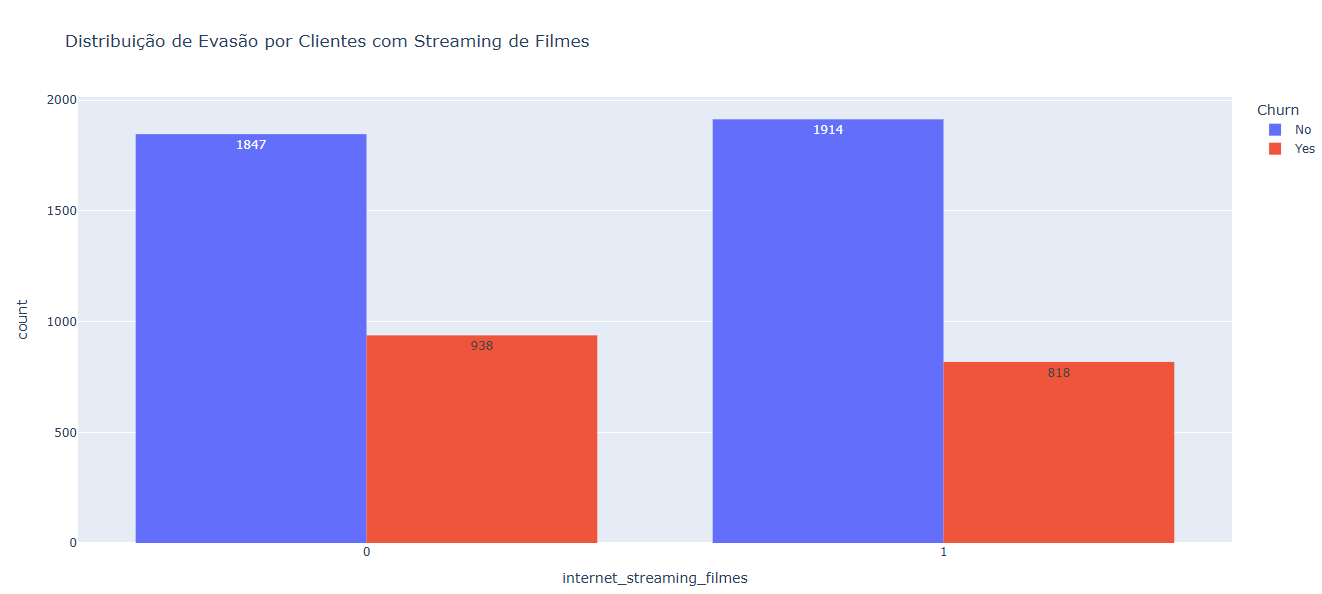

O padrão se repete nesse gráfico também.

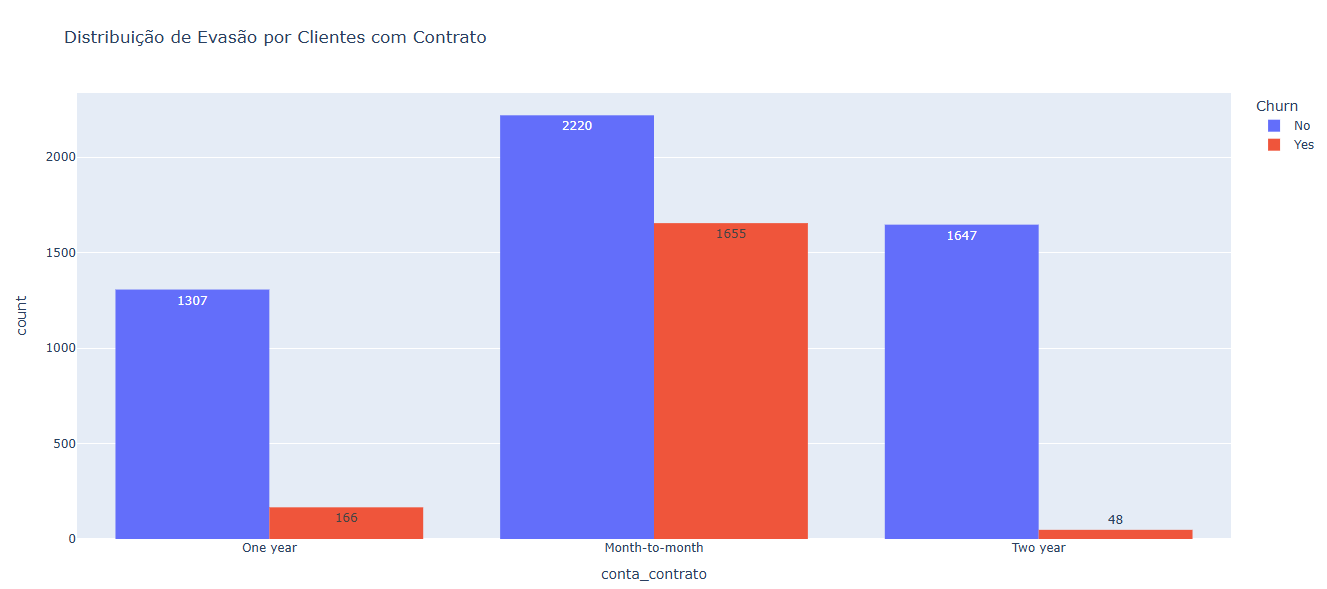

A taxa de evasão é muito maior em clientes que contratam mensalmente os planos.

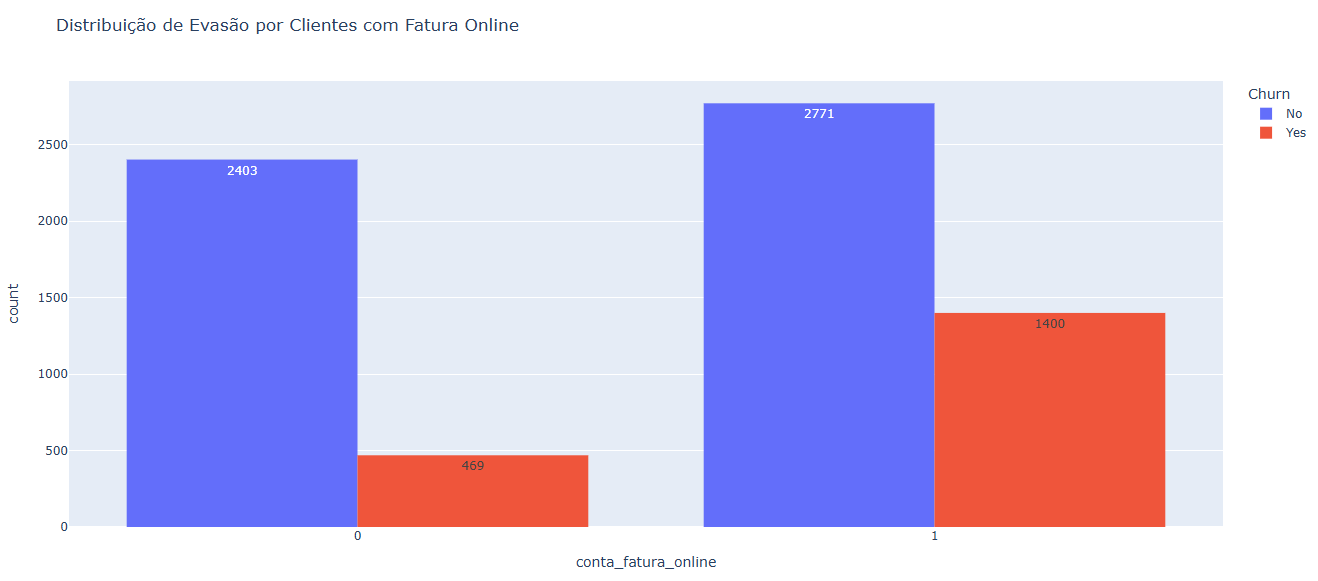

Pessoas que recebem a fatura online tendem a evadir a empresa.

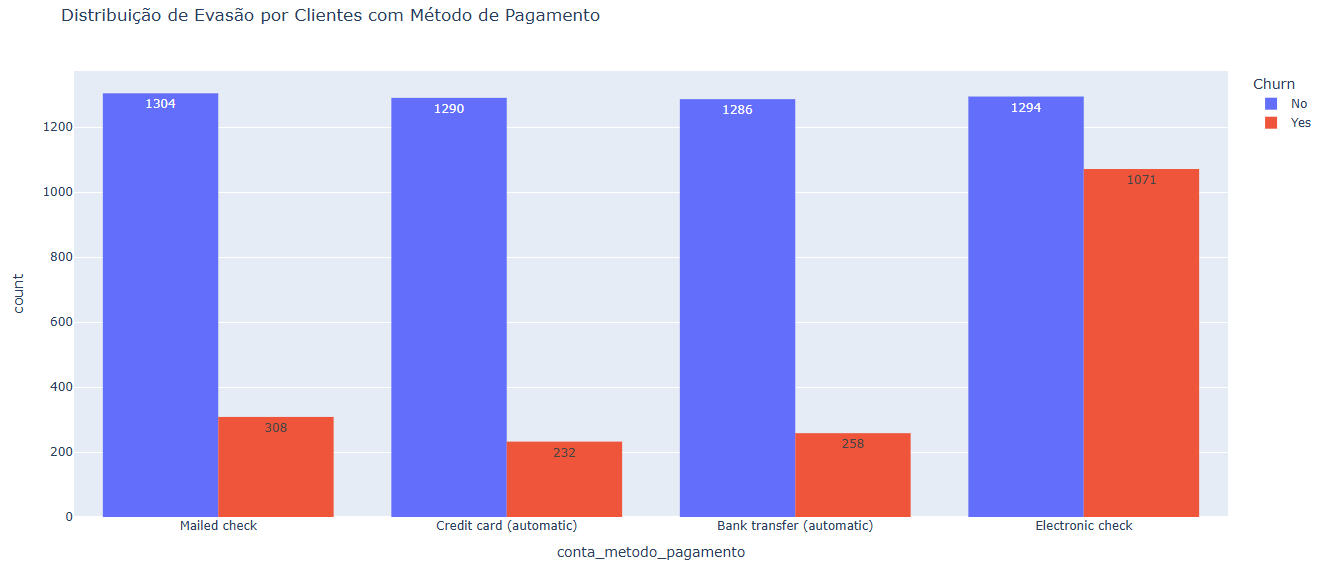

Cheques Eletrônicos lideram a evasão de clientes neste gráfico.

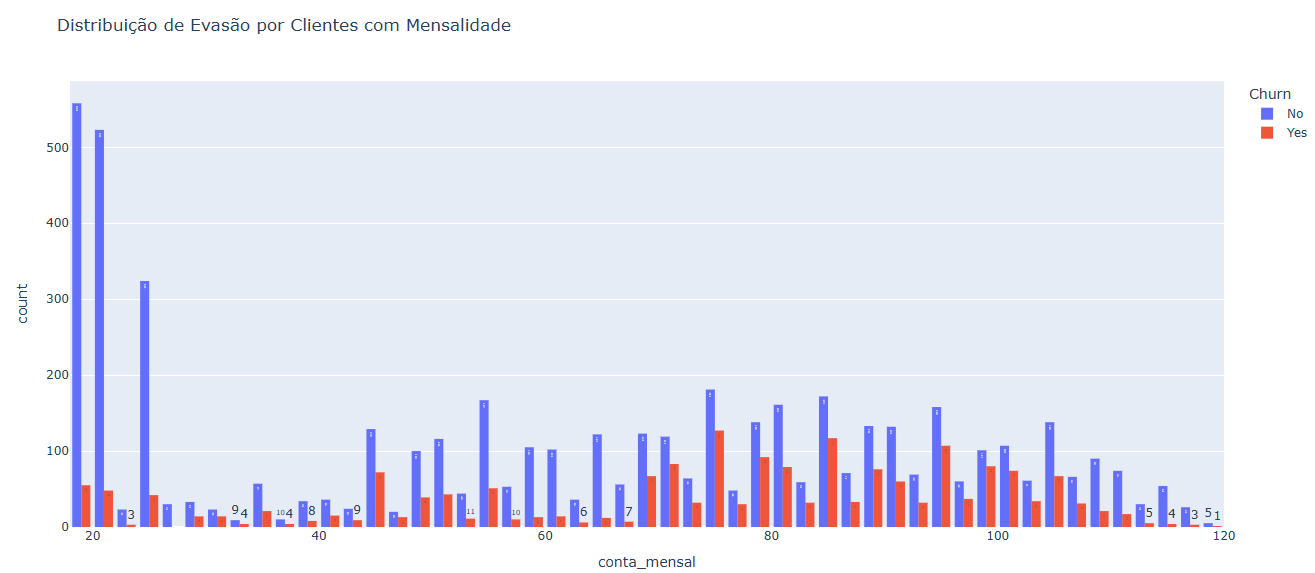

A evasão de clientes tende a aumentar caso a mensalidade for maior que 40 dólares ao decorrer dos meses ou for muito alta nos primeiros meses.

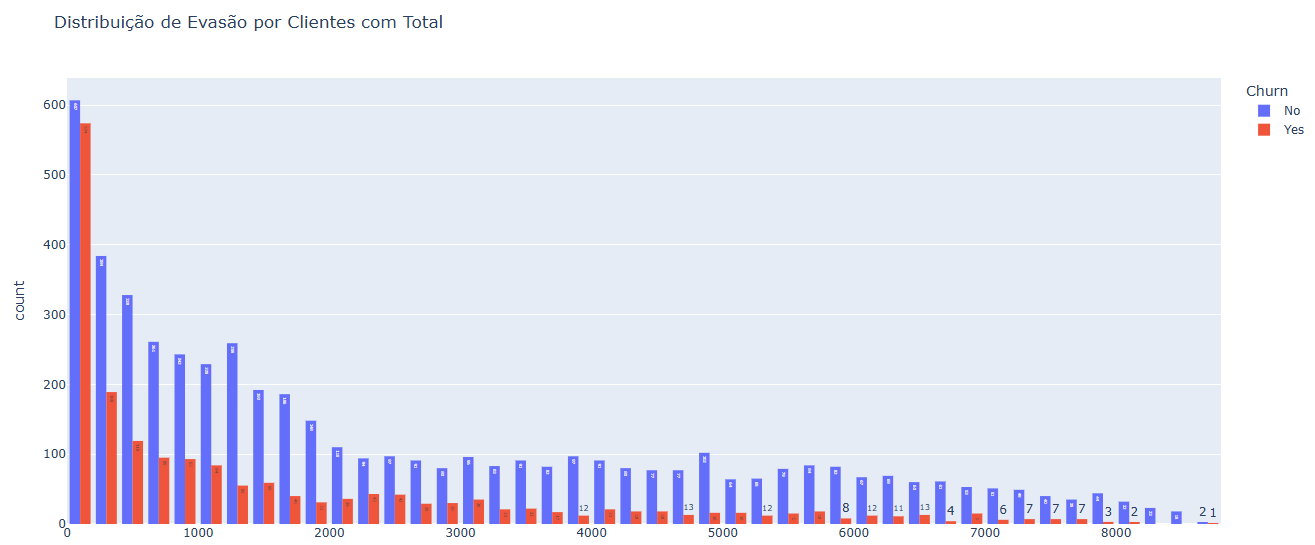

A evasão é muito maior nos primeiros meses, com maiores gastos totais. Clientes com maior tempo de fidelidade tendem a continuar com os serviços.

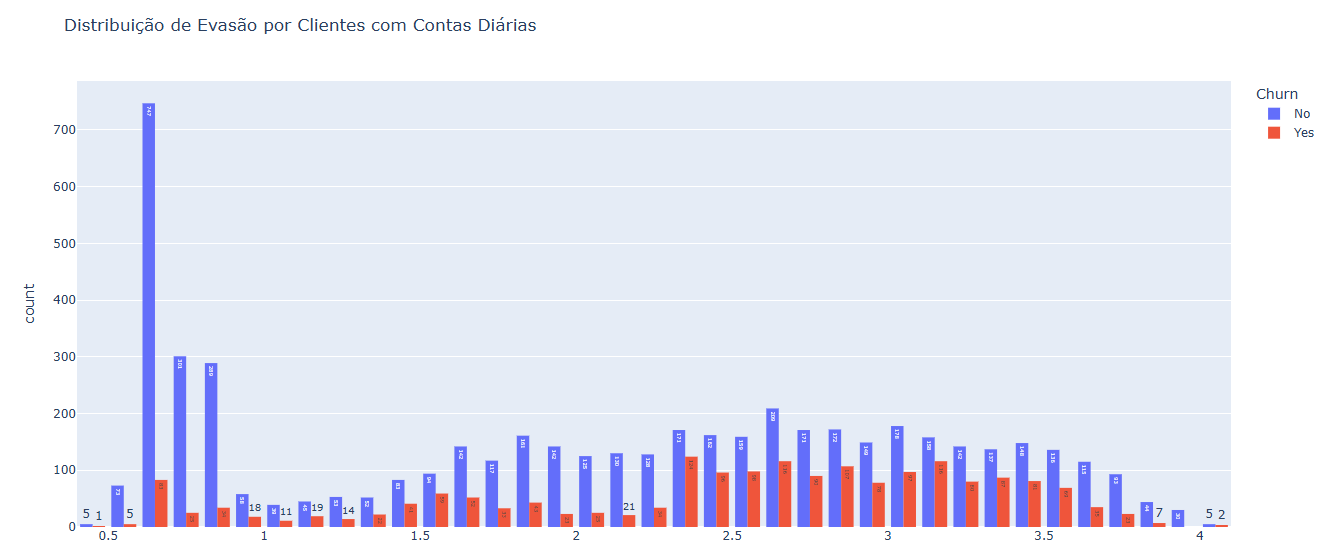

A evasão de clientes é maior caso custos diários do plano são acima de 1.5 ou 2 dólares.

# Conclusões ✍

Insights que possam reduzir o número de evasões em clientes:
* **Aperfeiçoar o Suporte Técnico**, tornando o atendimento personalizado e humanizado para clientes mais antigos e melhorando o suporte sem interação humana para clientes que são focados em tecnologia. Criar um índice de satisfação pós-atendimento;
* **Verificar a manutenção e expansão das estruturas de internet**, com foco na Fibra Óptica.
* **Focar na retenção de clientes que contratam os serviços mensalmente**, oferecendo melhores planos com valores atrativos nos primeiros três meses. Esse passo é crucial para reter clientes que não possuem dependentes para compartilhar os valores mensais dos planos.
* Demonstrar que o cliente estará totalmente seguro com os **planos de segurança e backup de internet** ou oferece-los com os planos básicos ou grátis nos primeiros meses, **tornando-os mais atrativos**.
* **Otimizar os métodos de pagamentos**, principalmente as faturas online e cheques eletrônicos, tornando-os mais pontuais ou oferecer outros meios mais convenientes para os clientes.